<a href="https://colab.research.google.com/github/rakibulalamshamim/MAT120lab/blob/main/Lab_Final_Solution_Section_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sympy import *

p, q = 2, 3                  #for example

In [3]:
#1a.
x = symbols('x')
y = (sin(x)**p + tan(q*x))/(1+p*x+q*x**2)

dy = diff(y,x)
ddy= diff(y,x,2)

display(dy.subs(x, pi/2), dy.subs(x, 2*pi), ddy.subs(x, pi/2), ddy.subs(x, 2*pi))

nan

3/(1 + 4*pi + 12*pi**2)

nan

2*(-6*(1 + 6*pi)/(1 + 4*pi + 12*pi**2) + 1)/(1 + 4*pi + 12*pi**2)

In [8]:
#1b
x, y, z = symbols('x y z')
phi = 3*x**2*z*asin(p*y)

phixx= diff(phi, x, x)
phiyy= diff(phi, y, y)
phizz= diff(phi, z, z)
display(phixx, phiyy, phizz)
Laplacian = phixx+phiyy+phizz

display("Laplacian=", Laplacian)

6*z*asin(2*y)

24*x**2*y*z/(1 - 4*y**2)**(3/2)

0

'Laplacian='

24*x**2*y*z/(1 - 4*y**2)**(3/2) + 6*z*asin(2*y)

In [12]:
#2a
x=symbols('x')
y = sin(p*x)

f= diff(y, x, 2) + 3*diff(y)-q*y
df = diff(f)

roots= solveset(df,x, Interval(-3*pi/2, 5*pi/2))

print('Number of extrema = ', len(roots))

Number of extrema =  8


In [16]:
#2b
x = symbols('x')
y = 4*x**p- x**3
f = diff(y, x, 2) - 3*diff(y) + 2*y
df = diff(f)
ddf = diff(f,x,2)
roots = solve(df,x)

for i in roots:
  if np.imag(complex(i)) != 0:
    print("No extremum for x= ", i)
  elif ddf.subs(x, i)>0:
    display("Minima= ", f.subs(x,i), "for x= ", i)

'Minima= '

-77 - 2*(17/6 - sqrt(109)/6)**3 + 17*(17/6 - sqrt(109)/6)**2 + 5*sqrt(109)

'for x= '

17/6 - sqrt(109)/6

In [15]:
#3a
x = symbols('x')
display(integrate(cos(ln(x))/x, (x, 1, 3)))

sin(log(3))

3b.
Here, $\ \ \ y(x)=\sin(x)\cos(x)/x$. $ \ \ $ So, we must predefine  $\ \ \ \ y_0=y(a)=1$ for $a=0$. Since we know $$\lim_{x \to 0}\frac{\sin(x)}{x}=1$$

In [19]:
import numpy as np
a = 0
b = 100
h = 0.01
t = 10**(-3)
dummy_var = 10

def y(x): return np.sin(x)*np.cos(x)/x

while True:
  x = np.arange(a, b+h, h)
  I = 1 + y(b)                                  # Predefining y(a)=1

  for i in range(1, len(x)-1):
    I = I + 2*y(x[i])
  Trapzoid = I*h/2

  if np.fabs(Trapzoid - dummy_var)<t:
    break
  else:
    dummy_var = Trapzoid
    b+=1

Trapzoid

0.7839246772481516

In [33]:
#4a

L, R, t = symbols('L R t')
I = symbols('I', cls= Function)
V = 5*exp(-q*t) + 10*sin(p*t)
LHS = L*diff(I(t),t) + R*I(t)
eqn = Eq(LHS, V)
soln= dsolve(eqn, ics= {I(0):0})
soln

Eq(I(t), -20*L*cos(2*t)/(4*L**2 + R**2) + 10*R*sin(2*t)/(4*L**2 + R**2) + (80*L**2 - 20*L*R + 5*R**2)*exp(-R*t/L)/(12*L**3 - 4*L**2*R + 3*L*R**2 - R**3) - 5*exp(-3*t)/(3*L - R))

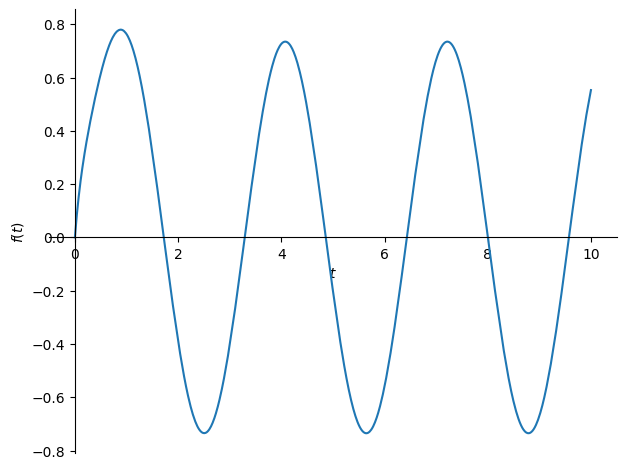

In [34]:
#4b
rl = soln.subs(L, p).subs(R, 10+q)
plot(rl.rhs, (t, 0, 10))

In [25]:
#5a

L, R, C, t = symbols('L R C t')
Q = symbols('Q', cls= Function)
V = 10
LHS = L*diff(Q(t),t, 2) + R*diff(Q(t),t) + Q(t)/C
eqn = Eq(LHS, V)
soln= dsolve(eqn, ics= {Q(0):0, diff(Q(t),t).subs(t, 0):10})
soln

Eq(Q(t), 10*C + (-5*C**2*R/sqrt(C**2*R**2 - 4*C*L) + 10*C*L/sqrt(C**2*R**2 - 4*C*L) - 5*C)*exp(t*(-R + sqrt(C*(C*R**2 - 4*L))/C)/(2*L)) + (5*C**2*R/sqrt(C**2*R**2 - 4*C*L) - 10*C*L/sqrt(C**2*R**2 - 4*C*L) - 5*C)*exp(-t*(R + sqrt(C*(C*R**2 - 4*L))/C)/(2*L)))

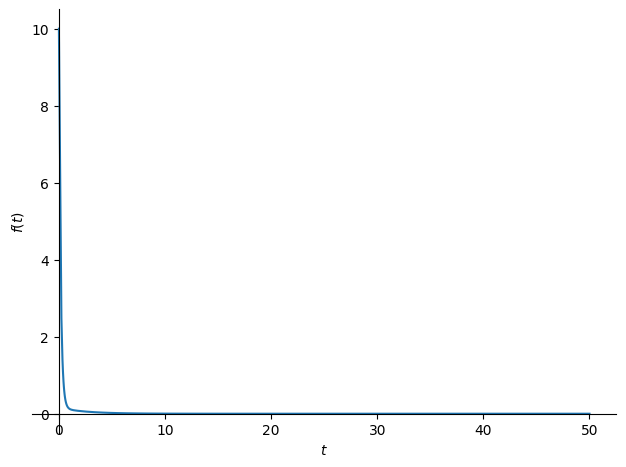

In [28]:
#5b
I = diff(soln.rhs, t)
plot(I.subs(L, p).subs(R, 10+q).subs(C, 0.1*p), (t, 0, 50))

In [29]:
#6a

m, r, t = symbols('m r t')
y = symbols('y', cls= Function)
LHS = m*diff(y(t),t,2) + r*diff(y(t),t) - 9.8*m
eqn = Eq(LHS, 0)
soln= dsolve(eqn, ics= {y(0):0, diff(y(t),t).subs(t, 0):0})
soln

Eq(y(t), 9.8*m**2*exp(-r*t/m)**1.0/r**2 - 9.8*m**2/r**2 + 9.8*m*t/r)

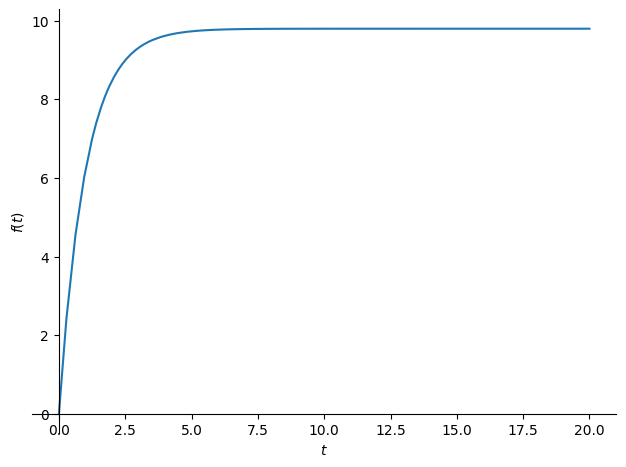

In [31]:
#6b

v = diff(soln.rhs, t).subs(m, 1).subs(r, 0.5*p)
plot(v, (t, 0, 20))

6c. The velocity reaches to a steady constant value called terminal velocity as time becomes very large.